In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

pd.options.display.max_columns = None
pd.options.display.max_rows = 70

# Wrangle Notebook
This notebook is for investigating and defining the data in the zillow dataset and makes decisions about how to handle the data present.

## Wrangle Decisions

- **`taxdelinquencyflag`**
    - Converted to Boolean where Y = True and Null = False

## Wrangle Code

##### Standard readin

In [2]:
df = wrangle.get_data()
df.head()

,storytypeid,typeconstructiontypeid,propertylandusetypeid,heatingorsystemtypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,transactiondate,id.1,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,heatingorsystemdesc,propertylandusedesc,typeconstructiondesc,storydesc
0,NaN,NaN,261.0,NaN,NaN,NaN,14297519,0,0.025595,2017-01-01,1727539,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,1.0,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,NaN,NaN,261.0,NaN,NaN,NaN,17052889,1,0.055619,2017-01-01,1387261,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,NaN,NaN,261.0,NaN,NaN,NaN,14186244,2,0.005383,2017-01-01,11677,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,NaN,NaN,261.0,2.0,NaN,NaN,12177905,3,-0.103410,2017-01-01,2288172,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,NaN,NaN,261.0,2.0,NaN,1.0,12095076,6,-0.001011,2017-01-01,781532,NaN,3.0,4.0,NaN,9.0,3.0,NaN,NaN,2962.0,2962.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34145202.0,-118179824.0,63000.0,1.0,NaN,NaN,NaN,1.0,0101,PSR2,6.037461e+07,47019.0,3101.0,274684.0,96293.0,0.0,NaN,1.0,NaN,NaN,1950.0,NaN,NaN,276684.0,773303.0,2016.0,496619.0,9516.26,NaN,NaN,6.037461e+13,Central,NaN,Central,Single Family Residential,NaN,NaN


In [4]:
df.shape

(52442, 68)

In [5]:
nullPercent = df.isna().mean().sort_index()
nullPercent


airconditioningdesc             0.739941
airconditioningtypeid           0.739941
architecturalstyledesc          0.998665
architecturalstyletypeid        0.998665
assessmentyear                  0.000000
basementsqft                    0.999104
bathroomcnt                     0.000000
bedroomcnt                      0.000000
buildingclasstypeid             1.000000
buildingqualitytypeid           0.356603
calculatedbathnbr               0.002612
calculatedfinishedsquarefeet    0.001564
censustractandblock             0.002345
decktypeid                      0.992582
finishedfloor1squarefeet        0.916460
finishedsquarefeet12            0.004710
finishedsquarefeet13            1.000000
finishedsquarefeet15            1.000000
finishedsquarefeet50            0.916460
finishedsquarefeet6             0.996854
fips                            0.000000
fireplacecnt                    0.861886
fireplaceflag                   0.998455
fullbathcnt                     0.002612
garagecarcnt    

In [6]:
nullPercent.sort_values()

logerror                        0.000000
fips                            0.000000
latitude                        0.000000
longitude                       0.000000
parcelid                        0.000000
propertycountylandusecode       0.000000
propertylandusedesc             0.000000
propertylandusetypeid           0.000000
rawcensustractandblock          0.000000
id.1                            0.000000
id                              0.000000
roomcnt                         0.000000
bedroomcnt                      0.000000
bathroomcnt                     0.000000
assessmentyear                  0.000000
transactiondate                 0.000000
regionidcounty                  0.000000
taxvaluedollarcnt               0.000019
landtaxvaluedollarcnt           0.000019
taxamount                       0.000076
regionidzip                     0.000496
calculatedfinishedsquarefeet    0.001564
structuretaxvaluedollarcnt      0.001602
yearbuilt                       0.002212
censustractandbl

##### taxdelquincyflag

In [7]:
# By assuming that null values are the equivelant to false, we can save the column taxdelinquencyflag
df.taxdelinquencyflag = df.taxdelinquencyflag == 'Y'

##### taxdelquincyyear

In [8]:
# By converting taxdelinquencyyear to instead be a measure of how long the property has been tax deliquent we can save ourselves from dropping the null values.
df['years_tax_delinquent'] = (2017 - (df.taxdelinquencyyear +2000).replace(2099, 1999)).fillna(0)

##### unitcnt

In [9]:
df.unitcnt.value_counts(dropna=False)

1.0    33818
NaN    18594
2.0       29
3.0        1
Name: unitcnt, dtype: int64

In [9]:
# Because the overwhelming majority of these is values is 1, we are probably safe imputing the 1 in the missing values.
df.unitcnt = df.unitcnt.fillna(1.0)

##### Bathroom

In [10]:
df.threequarterbathnbr.value_counts()

1.0    6645
2.0      70
3.0       8
7.0       1
Name: threequarterbathnbr, dtype: int64

In [11]:
df[df.threequarterbathnbr.isna()].bathroomcnt.value_counts(), df[~df.threequarterbathnbr.isna()].bathroomcnt.value_counts()

(2.0     21894
 3.0     10663
 1.0      9568
 4.0      2209
 5.0       784
 6.0       305
 0.0       121
 7.0        82
 8.0        53
 9.0        13
 2.5         8
 1.5         7
 10.0        5
 11.0        3
 18.0        1
 5.5         1
 13.0        1
 Name: bathroomcnt, dtype: int64,
 2.5    3926
 3.5     918
 1.5     834
 4.5     687
 5.5     223
 6.5      47
 5.0      19
 4.0      18
 6.0      17
 7.5      16
 3.0      10
 7.0       6
 8.5       3
 Name: bathroomcnt, dtype: int64)

In [12]:
ct = df[~df.threequarterbathnbr.isna()][['bathroomcnt', 'threequarterbathnbr','calculatedbathnbr']]
ct.sample(15)

,bathroomcnt,threequarterbathnbr,calculatedbathnbr
30601,2.5,1.0,2.5
41188,2.5,1.0,2.5
35339,2.5,1.0,2.5
39037,3.5,1.0,3.5
50970,4.5,1.0,4.5
10746,2.5,1.0,2.5
14060,2.5,1.0,2.5
38333,4.5,1.0,4.5
15021,2.5,1.0,2.5
6849,2.5,1.0,2.5


In [13]:
pd.crosstab(ct.calculatedbathnbr, ct.threequarterbathnbr)

threequarterbathnbr,1.0,2.0,3.0,7.0
calculatedbathnbr,,,,
1.5,834,0,0,0
2.5,3926,0,0,0
3.0,0,10,0,0
3.5,917,0,1,0
4.0,0,18,0,0
4.5,685,0,2,0
5.0,0,19,0,0
5.5,220,0,2,1
6.0,0,17,0,0


In [14]:
pd.crosstab(ct.calculatedbathnbr, ct.bathroomcnt)

bathroomcnt,1.5,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.5
calculatedbathnbr,,,,,,,,,,,,,
1.5,834,0,0,0,0,0,0,0,0,0,0,0,0
2.5,0,3926,0,0,0,0,0,0,0,0,0,0,0
3.0,0,0,10,0,0,0,0,0,0,0,0,0,0
3.5,0,0,0,918,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,18,0,0,0,0,0,0,0,0
4.5,0,0,0,0,0,687,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,19,0,0,0,0,0,0
5.5,0,0,0,0,0,0,0,223,0,0,0,0,0
6.0,0,0,0,0,0,0,0,0,17,0,0,0,0


In [15]:
## I'm not confident, but it's possible to save this column by adding it to the bathroomcnt as a new column called `bathroom_sum`
(df.bathroomcnt + (df.threequarterbathnbr.fillna(0) *.75)).value_counts(dropna=False)
(df.bathroomcnt + (df.threequarterbathnbr.fillna(0) *.75)).describe()
df['bathroom_sum'] = (df.bathroomcnt + (df.threequarterbathnbr.fillna(0) *.75))


##### Basement

In [16]:
df.isna().mean().sort_values().nlargest(3)

buildingclasstypeid     1.0
finishedsquarefeet15    1.0
finishedsquarefeet13    1.0
dtype: float64

In [17]:
# 100% nulls means we can drop
df = df.drop(columns=['buildingclasstypeid', 'finishedsquarefeet15', 'finishedsquarefeet13'])

In [18]:
df.isna().mean().sort_values().nlargest(3)

basementsqft    0.999104
storydesc       0.999104
storytypeid     0.999104
dtype: float64

In [19]:
df.storydesc.value_counts()

Basement    47
Name: storydesc, dtype: int64

In [20]:
# This looks like an example of incomplete data.  Don't think we can use it.
df = df.drop(columns=['basementsqft', 'storydesc', 'storytypeid'])

In [21]:
df.isna().mean().sort_values().nlargest(3)

yardbuildingsqft26          0.998799
architecturalstyledesc      0.998665
architecturalstyletypeid    0.998665
dtype: float64

In [22]:
nullPercent.sort_values()

logerror                        0.000000
fips                            0.000000
latitude                        0.000000
longitude                       0.000000
parcelid                        0.000000
propertycountylandusecode       0.000000
propertylandusedesc             0.000000
propertylandusetypeid           0.000000
rawcensustractandblock          0.000000
id.1                            0.000000
id                              0.000000
roomcnt                         0.000000
bedroomcnt                      0.000000
bathroomcnt                     0.000000
assessmentyear                  0.000000
transactiondate                 0.000000
regionidcounty                  0.000000
taxvaluedollarcnt               0.000019
landtaxvaluedollarcnt           0.000019
taxamount                       0.000076
regionidzip                     0.000496
calculatedfinishedsquarefeet    0.001564
structuretaxvaluedollarcnt      0.001602
yearbuilt                       0.002212
censustractandbl

##### garagecarcnt / garagetotalsqft


2.0     14802
1.0      2202
3.0       621
4.0       254
0.0        65
5.0        45
6.0        13
7.0         3
10.0        3
8.0         2
9.0         2
11.0        1
13.0        1
14.0        1
Name: garagecarcnt, dtype: int64
0.6564776324320202


<AxesSubplot:>

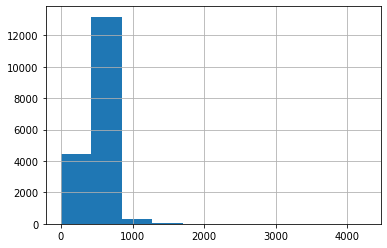

In [11]:
print(df.garagecarcnt.value_counts())
print(df.garagecarcnt.isna().mean())
df.garagetotalsqft.hist()

In [24]:
df[~df.garagecarcnt.isna()][['garagecarcnt','garagetotalsqft']].sample(15)


,garagecarcnt,garagetotalsqft
39800,2.0,662.0
22470,2.0,630.0
38460,2.0,496.0
34264,2.0,444.0
35210,2.0,532.0
875,2.0,461.0
21977,1.0,360.0
42365,2.0,687.0
27959,2.0,441.0
19452,2.0,455.0


<AxesSubplot:xlabel='garagecarcnt', ylabel='garagetotalsqft'>

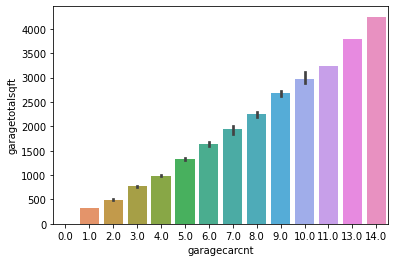

In [25]:
sns.barplot(data=df[~df.garagecarcnt.isna()][['garagecarcnt','garagetotalsqft']], x='garagecarcnt', y='garagetotalsqft')

In [26]:
df[df.garagecarcnt > 11]

,typeconstructiontypeid,propertylandusetypeid,heatingorsystemtypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,transactiondate,id.1,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,heatingorsystemdesc,propertylandusedesc,typeconstructiondesc,years_tax_delinquent,bathroom_sum
39923,NaN,261.0,NaN,NaN,NaN,17105318,58978,0.069479,2017-07-20,2833693,3.5,3.0,NaN,3.5,66.0,NaN,2778.0,2778.0,NaN,NaN,6111.0,1.0,3.0,13.0,3791.0,NaN,34285059.0,-119003488.0,143748.0,NaN,NaN,NaN,NaN,NaN,1110,NaN,6.111005e+07,34037.0,2061.0,NaN,97119.0,6.0,1.0,1.0,1011.0,NaN,2001.0,NaN,NaN,376000.0,1075000.0,2016.0,699000.0,11603.26,False,NaN,6.111005e+13,NaN,NaN,NaN,Single Family Residential,NaN,0.0,4.25
49064,NaN,261.0,NaN,NaN,NaN,14405807,72584,0.037381,2017-08-31,191413,3.0,4.0,NaN,3.0,NaN,NaN,4623.0,4623.0,NaN,NaN,6059.0,NaN,3.0,14.0,4251.0,1.0,33504821.0,-117674824.0,69696.0,1.0,NaN,NaN,1.0,NaN,122,NaN,6.059042e+07,33840.0,1286.0,NaN,96985.0,9.0,NaN,1.0,NaN,NaN,1988.0,1.0,NaN,507500.0,1697500.0,2016.0,1190000.0,17736.02,False,NaN,6.059042e+13,NaN,NaN,NaN,Single Family Residential,NaN,0.0,3.00


> I don't think these columns are worth saving

In [27]:
df = df.drop(columns= ['garagecarcnt','garagetotalsqft'])

##### numberofstories

In [28]:
df.numberofstories.value_counts(), df.numberofstories.isnull().mean()

(1.0    8890
 2.0    5318
 3.0     352
 6.0       1
 Name: numberofstories, dtype: int64,
 0.7223408718202967)

In [29]:
# Let's just trash it
df = df.drop(columns=['numberofstories'])

##### The big trim

In [30]:
nullPercent = df.isna().mean().sort_values()
dropcols = nullPercent[nullPercent > .5].index.tolist()
df = df.drop(columns=dropcols)


In [31]:
df.isna().mean().sort_values().nlargest(6)

buildingqualitytypeid    0.356603
propertyzoningdesc       0.354544
heatingorsystemdesc      0.352885
heatingorsystemtypeid    0.352885
regionidcity             0.019774
lotsizesquarefeet        0.007036
dtype: float64

<AxesSubplot:>

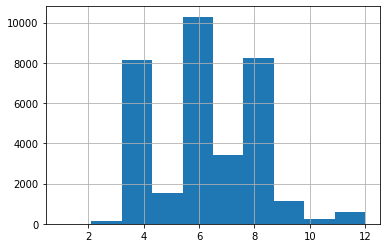

In [32]:
df.buildingqualitytypeid.hist()

In [33]:
df.buildingqualitytypeid.value_counts()

6.0     10289
8.0      8244
4.0      8157
7.0      3427
5.0      1513
9.0      1121
11.0      514
10.0      230
3.0       152
12.0       81
1.0         8
2.0         5
Name: buildingqualitytypeid, dtype: int64

In [34]:
df.propertyzoningdesc.value_counts()

LAR1          6498
LARS          1385
LBR1N         1111
SCUR2          712
LARE11         612
              ... 
LCR3800015       1
PSR6*            1
LARE             1
MYR3PY           1
BFA15000*        1
Name: propertyzoningdesc, Length: 1286, dtype: int64

##### Heating system

In [35]:
df.heatingorsystemdesc.value_counts(dropna=False), df.heatingorsystemdesc.isnull().mean()

(Central       20736
 NaN           18506
 Floor/Wall    12566
 Forced air      517
 Solar            85
 None             16
 Baseboard         7
 Radiant           6
 Gravity           2
 Yes               1
 Name: heatingorsystemdesc, dtype: int64,
 0.3528850921017505)

I think it's safe to impute the mode, "Central" for heating system

##### regionidcity

In [36]:
nullPercent = df.isna().mean().sort_values()
nullPercent

propertylandusetypeid           0.000000
propertylandusedesc             0.000000
taxdelinquencyflag              0.000000
assessmentyear                  0.000000
unitcnt                         0.000000
roomcnt                         0.000000
regionidcounty                  0.000000
rawcensustractandblock          0.000000
years_tax_delinquent            0.000000
longitude                       0.000000
latitude                        0.000000
fips                            0.000000
propertycountylandusecode       0.000000
logerror                        0.000000
parcelid                        0.000000
id                              0.000000
transactiondate                 0.000000
id.1                            0.000000
bathroomcnt                     0.000000
bathroom_sum                    0.000000
bedroomcnt                      0.000000
landtaxvaluedollarcnt           0.000019
taxvaluedollarcnt               0.000019
taxamount                       0.000076
regionidzip     

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

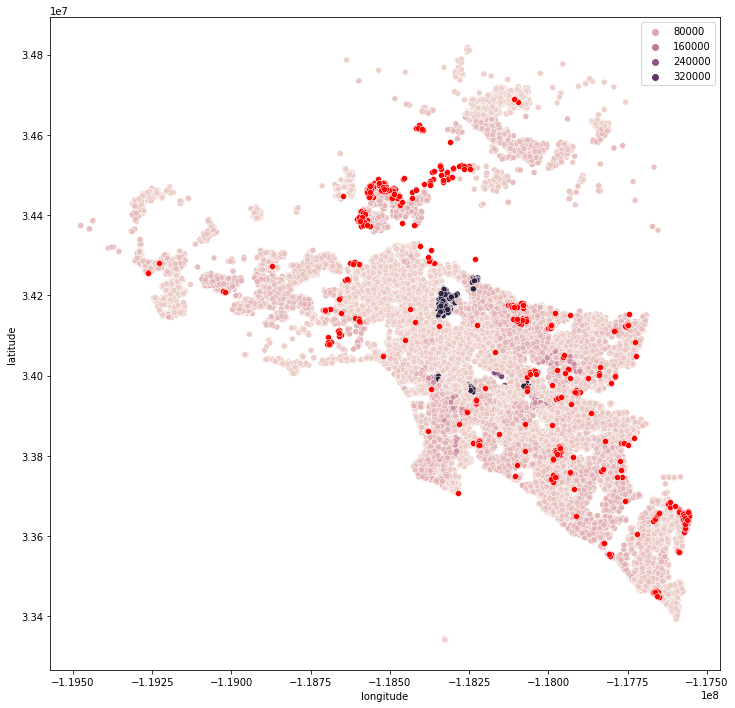

In [37]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df, y=df.latitude.name, x=df.longitude.name, hue=df.regionidcity.name)
sns.scatterplot(data=df[df.regionidcity.isna()], y=df.latitude.name, x=df.longitude.name, color='red')

In [38]:
df.regionidcity.isna().sum()

1037

Drop the nulls for regionidcity for now, but I can use a k-nearest-neighbors to impute the values.

### Define cleaning function

In [39]:
nullPercent = df.isna().mean().sort_values()
dropcols = nullPercent[nullPercent > .34].index.tolist()
df = df.drop(columns=dropcols)

In [40]:
df.shape, df.dropna().shape

((52442, 34), (50674, 34))

In [41]:
df.drop_duplicates(subset='parcelid').shape

(52320, 34)

In [42]:
def clean_zillow(df):
    # By assuming that null values are the equivelant to false, we can save the column taxdelinquencyflag
    df.taxdelinquencyflag = df.taxdelinquencyflag == 'Y'
    # By converting taxdelinquencyyear to instead be a measure of how long the property has been tax deliquent we can save ourselves from dropping the null values.
    df['years_tax_delinquent'] = (2017 - (df.taxdelinquencyyear +2000).replace(2099, 1999)).fillna(0)
    # Because the overwhelming majority of these is values is 1, we are probably safe imputing the 1 in the missing values.
    df.unitcnt = df.unitcnt.fillna(1.0)
    # Fill heating type with Central because it is the most common heating type
    df.heatingorsystemdesc = df.heatingorsystemdesc.fillna('Central')
    # Create a new bathroom count by including three-quarter bathrooms
    df['bathroom_sum'] = (df.bathroomcnt + (df.threequarterbathnbr.fillna(0) *.75))

    # Drop the rest of the columns that have a large null percentage
    nullPercent = df.isna().mean().sort_values()
    dropcols = nullPercent[nullPercent > .34].index.tolist()
    df = df.drop(columns=dropcols)
    
    #Don't need multiple id columns
    df = df.drop(columns=['id','id.1'])

    # Drop the rows that have a null value.
    df = df.dropna()

    # Drop duplicate parcels
    df = df.drop_duplicates(subset='parcelid')

    return df

In [43]:
df = wrangle.get_data()
df = clean_zillow(df)
df.shape

(50560, 33)

In [44]:
df.parcelid.value_counts()

14297519    1
10815651    1
13876105    1
10974377    1
11322267    1
           ..
11275238    1
11599215    1
12927549    1
13028248    1
12826780    1
Name: parcelid, Length: 50560, dtype: int64

#### Deciding more columns to drop

In [45]:
df.propertylandusetypeid.value_counts()

261.0    50560
Name: propertylandusetypeid, dtype: int64

In [46]:
cols_to_drop = []
cols_to_drop += ['propertylandusetypeid']
cols_to_drop

['propertylandusetypeid']

In [47]:
df.rawcensustractandblock.value_counts()

6.037920e+07    32
6.059032e+07    24
6.059032e+07    22
6.037142e+07    22
6.037901e+07    20
                ..
6.059001e+07     1
6.059042e+07     1
6.111008e+07     1
6.037460e+07     1
6.037503e+07     1
Name: rawcensustractandblock, Length: 30590, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

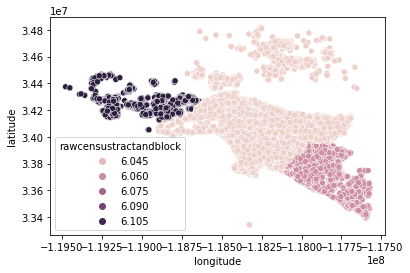

In [48]:
sns.scatterplot(data=df, y=df.latitude.name, x=df.longitude.name, hue=df.rawcensustractandblock.name)

In [49]:
# Just another function of lat/long IMO
cols_to_drop += ['rawcensustractandblock']
cols_to_drop

['propertylandusetypeid', 'rawcensustractandblock']

In [50]:
cols_to_drop += ['logerror','transactiondate']
cols_to_drop

['propertylandusetypeid',
 'rawcensustractandblock',
 'logerror',
 'transactiondate']

In [51]:
df.propertycountylandusecode.value_counts()

0100    25939
122     12498
0101     6147
1111     3337
1        1002
1110      982
0104      357
0103       86
010G       78
0108       54
010M       48
0109        8
0113        6
0110        6
0102        3
0111        2
0105        2
0133        1
0131        1
1112        1
0114        1
0130        1
Name: propertycountylandusecode, dtype: int64

In [52]:
cols_to_drop += ['propertycountylandusecode']


In [53]:
df.regionidzip.value_counts(), df.regionidcity.value_counts(), df.regionidcounty.value_counts()

(97319.0    762
 97318.0    657
 97329.0    562
 97328.0    517
 97118.0    495
           ... 
 96039.0      2
 96148.0      1
 97092.0      1
 96038.0      1
 96467.0      1
 Name: regionidzip, Length: 378, dtype: int64,
 12447.0    11275
 5534.0      1758
 40227.0     1485
 46298.0     1420
 16764.0     1067
            ...  
 32927.0        3
 31134.0        2
 36078.0        1
 10815.0        1
 21395.0        1
 Name: regionidcity, Length: 175, dtype: int64,
 3101.0    32740
 1286.0    13500
 2061.0     4320
 Name: regionidcounty, dtype: int64)

In [54]:
pd.crosstab(df.fips, df.regionidcounty)

regionidcounty,1286.0,2061.0,3101.0
fips,,,
6037.0,0,0,32740
6059.0,13500,0,0
6111.0,0,4320,0


In [55]:
cols_to_drop += ['regionidcounty']

In [56]:
df.dtypes

propertylandusetypeid           float64
parcelid                          int64
logerror                        float64
transactiondate                  object
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
unitcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64


In [57]:
cols_to_drop += ['propertylandusedesc']

In [58]:
cols_to_drop.sort()
cols_to_drop

['logerror',
 'propertycountylandusecode',
 'propertylandusedesc',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcounty',
 'transactiondate']

In [59]:
def clean_zillow(df):
    # By assuming that null values are the equivelant to false, we can save the column taxdelinquencyflag
    df.taxdelinquencyflag = df.taxdelinquencyflag == 'Y'
    # By converting taxdelinquencyyear to instead be a measure of how long the property has been tax deliquent we can save ourselves from dropping the null values.
    df['years_tax_delinquent'] = (2017 - (df.taxdelinquencyyear +2000).replace(2099, 1999)).fillna(0)
    # Because the overwhelming majority of these is values is 1, we are probably safe imputing the 1 in the missing values.
    df.unitcnt = df.unitcnt.fillna(1.0)
    # Fill heating type with Central because it is the most common heating type
    df.heatingorsystemdesc = df.heatingorsystemdesc.fillna('Central')
    # Create a new bathroom count by including three-quarter bathrooms
    df['bathroom_sum'] = (df.bathroomcnt + (df.threequarterbathnbr.fillna(0) *.75))

    # Drop the rest of the columns that have a large null percentage
    nullPercent = df.isna().mean().sort_values()
    dropcols = nullPercent[nullPercent > .34].index.tolist()
    df = df.drop(columns=dropcols)
    
    # Drop columns that duplicate data or leak predicitons from previous model
    df = df.drop(columns=[  'id',
                            'id.1',
                            'assessmentyear',
                            'logerror',
                            'propertycountylandusecode',
                            'propertylandusedesc',
                            'propertylandusetypeid',
                            'rawcensustractandblock',
                            'censustractandblock',
                            'regionidcounty',
                            'transactiondate',
                            'taxamount'])

    # Drop the rows that have a null value.
    df = df.dropna()

    # Drop duplicate parcels
    df = df.drop_duplicates(subset='parcelid')
    
    # Convert some columns into more useful information
    df['age'] = 2017 - df.yearbuilt

    return df

In [60]:
df = wrangle.get_data()
df = clean_zillow(df)

#### Identifying categorical and numeric columns

In [61]:
# The investigation so far has shed some light on what is in each column.  I can infer from my knowledge so far some of the categorical columns.
df.dtypes

parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
regionidcity                    float64
regionidzip                     float64
roomcnt                         float64
unitcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
landtaxvaluedollarcnt           float64
taxdelinquencyflag                 bool
heatingorsystemdesc              object
years_tax_delinquent            float64
bathroom_sum                    float64
age                             float64
dtype: object

In [62]:
cat_cols = ['parcelid',
            'fips',
            'regionidcity',
            'regionidzip',
            'yearbuilt',
            'heatingorsystemdesc',
            'bathroom_sum']

In [63]:
df.regionidzip.nlargest(), df.regionidzip.value_counts()

(3145     399675.0
 5165     399675.0
 16505    399675.0
 24136    399675.0
 26047    399675.0
 Name: regionidzip, dtype: float64,
 97319.0    763
 97318.0    660
 97329.0    563
 97328.0    517
 97118.0    495
           ... 
 96002.0      2
 96038.0      1
 96148.0      1
 97092.0      1
 96467.0      1
 Name: regionidzip, Length: 378, dtype: int64)

In [64]:
(df.regionidzip == 399675).sum(), (df.regionidzip == 99675).sum()

(11, 0)

In [65]:
df.regionidzip = df.regionidzip.replace(399675, 99675)
(df.regionidzip == 399675).sum(), (df.regionidzip == 99675).sum()

(0, 11)

In [66]:
df[[df.latitude.name, df.longitude.name]].sample(1) / 1_000_000

,latitude,longitude
17107,33.689068,-117.972332


In [67]:
df.latitude = df.latitude / 1_000_000
df.longitude = df.longitude / 1_000_000

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

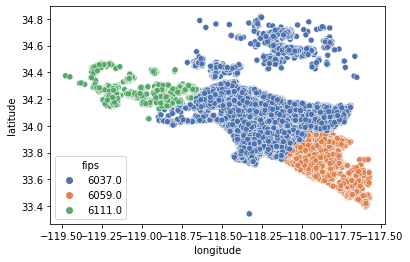

In [68]:
sns.scatterplot(data=df, y=df.latitude.name, x=df.longitude.name, hue=df.fips.name, palette='deep')

In [69]:
def dropna_df(df):
    """Returns a dataframe free of null values where the columns have the proper dtypes"""
    df = df.dropna()
    df = df.convert_dtypes()
    # convert_dtypes() chooses some slightly wonky data types that cause problems later.
    # Fix the wonk by creating a new dataframe from the dataframe.
    fix = pd.DataFrame(df.to_dict()) 
    return fix

df = dropna_df(df)
df.dtypes

parcelid                          int64
bathroomcnt                     float64
bedroomcnt                        int64
calculatedbathnbr               float64
calculatedfinishedsquarefeet      int64
finishedsquarefeet12              int64
fips                              int64
fullbathcnt                       int64
latitude                        float64
longitude                       float64
lotsizesquarefeet                 int64
regionidcity                      int64
regionidzip                       int64
roomcnt                           int64
unitcnt                           int64
yearbuilt                         int64
structuretaxvaluedollarcnt        int64
taxvaluedollarcnt                 int64
landtaxvaluedollarcnt             int64
taxdelinquencyflag                 bool
heatingorsystemdesc              object
years_tax_delinquent              int64
bathroom_sum                    float64
age                               int64
dtype: object

In [70]:
for col in cat_cols:
    df[col] = df[col].astype('category')

df.dtypes, cat_cols

(parcelid                        category
 bathroomcnt                      float64
 bedroomcnt                         int64
 calculatedbathnbr                float64
 calculatedfinishedsquarefeet       int64
 finishedsquarefeet12               int64
 fips                            category
 fullbathcnt                        int64
 latitude                         float64
 longitude                        float64
 lotsizesquarefeet                  int64
 regionidcity                    category
 regionidzip                     category
 roomcnt                            int64
 unitcnt                            int64
 yearbuilt                       category
 structuretaxvaluedollarcnt         int64
 taxvaluedollarcnt                  int64
 landtaxvaluedollarcnt              int64
 taxdelinquencyflag                  bool
 heatingorsystemdesc             category
 years_tax_delinquent               int64
 bathroom_sum                    category
 age                              

### Test wrangle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import wrangle



## Outlier handling

In [50]:

df = wrangle.get_data()
df = wrangle.clean_zillow(df)

df, _, __ = wrangle.train_test_validate_split(df, seed=9)


(<AxesSubplot:>,
 count    2.024300e+04
 mean     5.281905e+05
 std      7.170256e+05
 min      9.242000e+03
 25%      1.940600e+05
 50%      3.714220e+05
 75%      6.138895e+05
 max      2.434570e+07
 Name: taxvaluedollarcnt, dtype: float64)

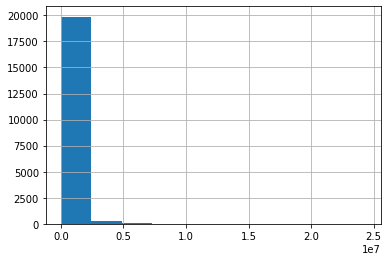

In [51]:
df.taxvaluedollarcnt.hist(), df.taxvaluedollarcnt.describe()

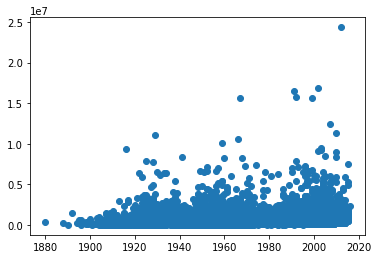

In [52]:
plt.scatter(x=df.yearbuilt, y=df.taxvaluedollarcnt)

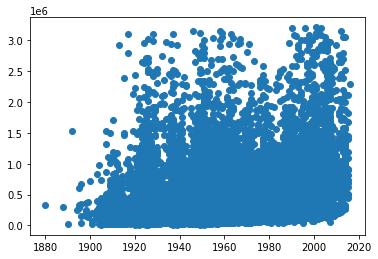

In [53]:
uplim = np.percentile(df.taxvaluedollarcnt, 99)
uplim_mask = df.taxvaluedollarcnt > uplim

plt.scatter(x=df[~uplim_mask].yearbuilt, y=df[~uplim_mask].taxvaluedollarcnt)

In [54]:
alter = df[uplim_mask]
df = df[~uplim_mask]

In [55]:
def trim_zillow(df):
    uplim = np.percentile(df.taxvaluedollarcnt, 99)
    uplim_mask = df.taxvaluedollarcnt > uplim
    alter = df[uplim_mask]
    df = df[~uplim_mask]

    return df, alter

# df, alter = trim_zillow(df)

<AxesSubplot:xlabel='lotsizesquarefeet', ylabel='calculatedfinishedsquarefeet'>

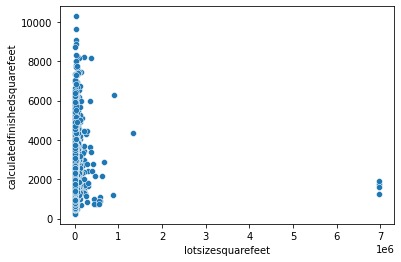

In [56]:
sns.scatterplot(x=df.lotsizesquarefeet, y=df.calculatedfinishedsquarefeet)

In [57]:
df.lotsizesquarefeet.nlargest(10)

11202    6971010
18741    6971010
20363    6971010
36442    6971010
21276    1323788
21227     889495
21364     872158
45085     672149
26815     623746
41041     588738
Name: lotsizesquarefeet, dtype: int64

In [58]:
uplim = np.percentile(df.lotsizesquarefeet, 99.5)
uplim_mask = df.lotsizesquarefeet > uplim
alter = pd.concat((alter, df[uplim_mask]))
df = df[~uplim_mask]

<AxesSubplot:xlabel='lotsizesquarefeet', ylabel='calculatedfinishedsquarefeet'>

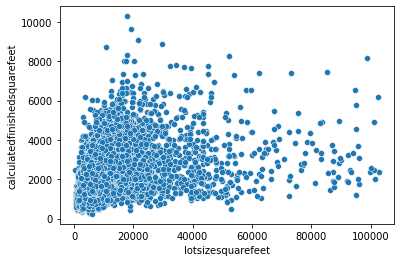

In [59]:
sns.scatterplot(x=df.lotsizesquarefeet, y=df.calculatedfinishedsquarefeet)

In [60]:
df[df.lotsizesquarefeet < 500][['latitude','longitude','parcelid','lotsizesquarefeet','calculatedfinishedsquarefeet']]

,latitude,longitude,parcelid,lotsizesquarefeet,calculatedfinishedsquarefeet
45424,34.262193,-118.727145,17247439,236,2465


There is no way that's a 236 sqft lot.  
![image](https://i.imgur.com/gTNnAfU.png)

In [63]:
df[df.lotsizesquarefeet < df.calculatedfinishedsquarefeet ][['latitude','longitude','parcelid','lotsizesquarefeet','calculatedfinishedsquarefeet']]

,latitude,longitude,parcelid,lotsizesquarefeet,calculatedfinishedsquarefeet
28293,33.637866,-117.903788,14282858,3276,3964
6917,34.093752,-118.253717,11941233,1038,1200
16763,33.550389,-117.804654,13894685,3660,4113
2674,33.747545,-118.120401,12529119,2414,3974
22056,33.637178,-117.882160,14295758,1489,1737
...,...,...,...,...,...
46223,33.682433,-118.024284,13861007,2040,2298
25623,33.654674,-117.979724,14044292,860,1270
2170,33.712322,-118.064603,14080473,1170,1500
24821,33.595879,-117.884398,13889807,3200,4895


In [62]:
df = df[~df.lotsizesquarefeet < df.calculatedfinishedsquarefeet ]

In [68]:
def trim_zillow(df):
    # Trim the tax value outliers
    uplim = np.percentile(df.taxvaluedollarcnt, 99)
    uplim_mask = df.taxvaluedollarcnt > uplim
    df = df[~uplim_mask]
    # Trim the lot squarefoot outliers
    uplim = np.percentile(df.lotsizesquarefeet, 99.5)
    uplim_mask = df.lotsizesquarefeet > uplim
    df = df[~uplim_mask]
    # Trim some *probably* bad data
    df = df[~df.lotsizesquarefeet < df.calculatedfinishedsquarefeet ]

    return df

df = trim_zillow(df)
df.shape

(19064, 24)

#### Test wrangle

In [1]:
# Restart kernal for new version of wrangle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import wrangle

pd.options.display.max_columns = None

In [2]:
train, test, validate = wrangle.wrangle_zillow()
train.shape, test.shape, validate.shape

((19994, 22), (14996, 22), (14997, 22))

In [3]:
train.head()

,parcelid,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age
37325,13012307,5,3.0,2924,6037,3,34.064613,-118.071274,9442,54212,96510,0,1,1992,307834,520912,213078,False,Central,0,3.00,25
20374,12955005,3,2.0,2010,6037,2,34.051936,-117.904897,13476,14542,96524,0,1,1954,117769,588845,471076,False,Central,0,2.00,63
17760,14314385,5,4.0,4371,6059,4,33.615642,-117.855677,10625,53571,96978,9,1,1971,290516,2284848,1994332,False,Central,0,4.00,46
36062,12019442,3,5.0,3232,6037,5,34.097654,-118.372086,5034,12447,96050,0,1,1963,447538,1535361,1087823,False,Central,0,5.00,54
45153,14415448,4,2.5,1776,6059,2,33.536297,-117.701880,2244,25459,96987,0,1,1995,170913,295362,124449,False,Central,0,2.75,22


In [11]:
# Do some renaming
df = train
df.rename(columns={
    'calculatedfinishedsquarefeet' : 'structure_sqft',
    'calculatedbathnbr' : 'calc_bath',
    'lotsizesquarefeet' : 'lot_sqft',
    'structuretaxvaluedollarcnt': 'tax_structure',
    'taxvaluedollarcnt': 'tax',
    'landtaxvaluedollarcnt': 'tax_land'
    
})

,parcelid,bedroomcnt,calc_bath,structure_sqft,fips,fullbathcnt,latitude,longitude,lot_sqft,regionidcity,regionidzip,roomcnt,unitcnt,yearbuilt,tax_structure,tax,tax_land,taxdelinquencyflag,heatingorsystemdesc,years_tax_delinquent,bathroom_sum,age
37325,13012307,5,3.0,2924,6037,3,34.064613,-118.071274,9442,54212,96510,0,1,1992,307834,520912,213078,False,Central,0,3.00,25
20374,12955005,3,2.0,2010,6037,2,34.051936,-117.904897,13476,14542,96524,0,1,1954,117769,588845,471076,False,Central,0,2.00,63
17760,14314385,5,4.0,4371,6059,4,33.615642,-117.855677,10625,53571,96978,9,1,1971,290516,2284848,1994332,False,Central,0,4.00,46
36062,12019442,3,5.0,3232,6037,5,34.097654,-118.372086,5034,12447,96050,0,1,1963,447538,1535361,1087823,False,Central,0,5.00,54
45153,14415448,4,2.5,1776,6059,2,33.536297,-117.701880,2244,25459,96987,0,1,1995,170913,295362,124449,False,Central,0,2.75,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10931,14347612,4,3.0,2951,6059,3,33.720716,-117.762733,5000,52650,96954,9,1,1977,239214,1038547,799333,False,Central,0,3.00,40
36702,14418204,5,4.5,5888,6059,4,33.528539,-117.727714,9720,25459,96987,0,1,1998,961231,2630457,1669226,False,Central,0,4.75,19
19354,12900133,2,1.0,1255,6037,1,34.105793,-117.780575,5975,39308,96494,0,1,1947,38700,47994,9294,False,Central,0,1.00,70
27256,11024363,2,1.0,876,6037,1,34.252590,-118.418376,5007,12447,96361,0,1,1952,96600,333300,236700,False,Floor/Wall,0,1.00,65


In [12]:
def rename_zillow(df):
    df = df.rename(columns={
        'calculatedfinishedsquarefeet' : 'structure_sqft',
        'calculatedbathnbr' : 'calc_bath',
        'lotsizesquarefeet' : 'lot_sqft',
        'structuretaxvaluedollarcnt': 'tax_structure',
        'taxvaluedollarcnt': 'tax',
        'landtaxvaluedollarcnt': 'tax_land'
        })
    return df